In [3]:
pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.8/18.8 MB 7.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [rasterio]5/6 [rasterio]
Note: you may need to restart the kernel to use updated packages.


In [4]:
import rasterio
import rasterio.plot

In [6]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pandas]2m1/2 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [geopandas]/4 [geopandas]
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import shapely
import geopandas as gpd

In [9]:
import glob

In [11]:
pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt

In [14]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 7.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
import os
import scipy.ndimage

In [16]:
src = rasterio.open ('/Users/shazia_manuawar/Documents/data/BSV_res200-M.tif')

In [17]:
src.transform

Affine(2.0, 0.0, 170000.0,
       0.0, -2.0, 580000.0)

In [18]:
#top left of the raster
src.transform * (0, 0)

(170000.0, 580000.0)

In [19]:
#bottom right corner of the raster
src.transform * (src.width, src.height)

(190000.0, 560000.0)

In [20]:
src.bounds

BoundingBox(left=170000.0, bottom=560000.0, right=190000.0, top=580000.0)

- Q. How can we create a GeoDataFrame with one polygon feature, representing the raster bounds?

In [21]:
gdf = gpd.GeoDataFrame (src.bounds)

In [22]:
gdf

,0
0,170000.0
1,560000.0
2,190000.0
3,580000.0


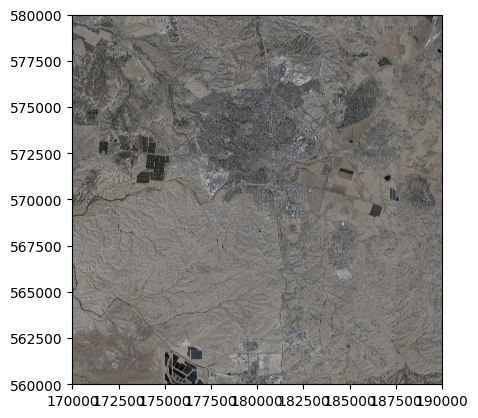

<Axes: >

In [23]:
rasterio.plot.show(src)

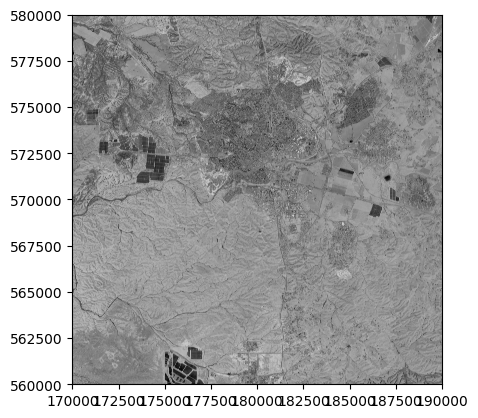

<Axes: >

In [24]:
rasterio.plot.show ((src, 1) , cmap = 'Greys_r')

### Variable length positional arguments (*)

In [25]:
def paste(*args):
    result = ''
    for arg in args:
        result += str(arg)  # Convert each item to a string and add to result
    return result

In [26]:
paste('Hello','World')

'HelloWorld'

In [27]:
paste('A','B','C',1,2,3)

'ABC123'

In [28]:
pattern = ('/Users/shazia_manuawar/Documents/data/T36RXV_20201226T082249')

In [29]:
files = [pattern + '_B02.jp2', #Blue
         pattern + '_B03.jp2', # Green
         pattern + '_B04.jp2', # Red
         pattern + '_B08.jp2'  # NIR
        ]
files 

['/Users/shazia_manuawar/Documents/data/T36RXV_20201226T082249_B02.jp2',
 '/Users/shazia_manuawar/Documents/data/T36RXV_20201226T082249_B03.jp2',
 '/Users/shazia_manuawar/Documents/data/T36RXV_20201226T082249_B04.jp2',
 '/Users/shazia_manuawar/Documents/data/T36RXV_20201226T082249_B08.jp2']

In [30]:
# Establish connection to any of the images and find its metadata to use it later
src = rasterio.open (files [0])

In [31]:
meta = src.meta
meta

{'driver': 'JP2OpenJPEG',
 'dtype': 'uint16',
 'nodata': None,
 'width': 3554,
 'height': 2968,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32636"]]'),
 'transform': Affine(10.000856049521643, 0.0, 652642.4115,
        0.0, -10.000219878706249, 3473256.1222)}

The metadata is common to all the files. However, we'll change the count to 4 since our new raster image is going to be a multiband image of four layers. Also, we'll change the driver to Geotiff.

In [32]:
meta.update(count = len(files))
meta.update(driver = 'GTiff')

In [33]:
meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 3554,
 'height': 2968,
 'count': 4,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32636"]]'),
 'transform': Affine(10.000856049521643, 0.0, 652642.4115,
        0.0, -10.000219878706249, 3473256.1222)}

In [34]:
dst = rasterio.open ('/Users/shazia_manuawar/Documents/data/output/sentinel2.tiff', 'w', **meta)
for index, filename in enumerate(files, start=1):
    src = rasterio.open(filename)
    dst.write(src.read(1), index)
    src.close()
dst.close()

In [35]:
stacked = rasterio.open ('/Users/shazia_manuawar/Documents/data/output/sentinel2.tiff')

In [36]:
r = stacked.read()

In [37]:
r.shape

(4, 2968, 3554)

In [38]:
import numpy as np

In [39]:
# avg value per pixel for the four bands
np.mean(r, axis = (0))

array([[2058.75, 2013.  , 2055.25, ..., 1739.25, 1767.75, 1742.25],
       [2088.  , 2037.  , 2051.25, ..., 1666.25, 1759.  , 1771.  ],
       [2098.75, 2063.75, 2068.5 , ..., 1560.5 , 1662.  , 1747.5 ],
       ...,
       [2060.25, 2061.75, 2082.25, ..., 2891.  , 2978.5 , 3014.5 ],
       [2073.25, 2049.75, 2042.75, ..., 3053.  , 3073.75, 3093.5 ],
       [2027.75, 2013.5 , 2034.25, ..., 3027.75, 3153.5 , 3077.25]],
      shape=(2968, 3554))

In [40]:
(np.mean(r, axis = (0))).shape

(2968, 3554)

In [41]:
r = r / 10000

In [42]:
r

array([[[0.16  , 0.156 , 0.1598, ..., 0.1272, 0.1315, 0.1316],
        [0.1614, 0.157 , 0.1608, ..., 0.1196, 0.1262, 0.1316],
        [0.163 , 0.1584, 0.1619, ..., 0.1131, 0.1191, 0.1295],
        ...,
        [0.1597, 0.1576, 0.1599, ..., 0.2149, 0.2201, 0.2169],
        [0.1602, 0.1597, 0.1569, ..., 0.222 , 0.2238, 0.2228],
        [0.1577, 0.1577, 0.1563, ..., 0.2191, 0.2296, 0.2195]],

       [[0.1735, 0.1681, 0.1719, ..., 0.1361, 0.1396, 0.1358],
        [0.1747, 0.1711, 0.1723, ..., 0.1245, 0.1356, 0.1398],
        [0.1766, 0.1754, 0.1739, ..., 0.1133, 0.124 , 0.1344],
        ...,
        [0.1738, 0.1722, 0.1747, ..., 0.2501, 0.2602, 0.2647],
        [0.1736, 0.1736, 0.1705, ..., 0.2655, 0.2684, 0.2671],
        [0.1688, 0.169 , 0.168 , ..., 0.2652, 0.2719, 0.2693]],

       [[0.2107, 0.2101, 0.2107, ..., 0.1514, 0.161 , 0.1568],
        [0.212 , 0.2108, 0.2104, ..., 0.1294, 0.151 , 0.1549],
        [0.214 , 0.2124, 0.2109, ..., 0.0983, 0.1248, 0.1463],
        ...,
        [0.2

In [43]:
[r.min(), r.max()]

[np.float64(0.0), np.float64(2.7999)]

In [44]:
# how many values `>1` do we have in `r`?
count = np.sum (r>1)
count

np.int64(228)

In [45]:
# Find pixels where any band > 1
outlier = np.any (r>1, axis = 0)

# Count how many such pixels tehre are
sum = np.sum (outlier)

print (sum)

120


In [46]:
# raster algebra : calculation of ndvi
ndvi = (r[3] - r[2]) / (r[3] + r[2])
ndvi

array([[0.14      , 0.12658491, 0.14070147, ..., 0.29972248, 0.26146789,
        0.26984866],
       [0.15047085, 0.13375796, 0.13664341, ..., 0.38731061, 0.31643278,
        0.29107551],
       [0.14382877, 0.13605857, 0.14198535, ..., 0.5057818 , 0.40811003,
        0.32751092],
       ...,
       [0.09335508, 0.09921196, 0.09692956, ..., 0.05553949, 0.06145409,
        0.04998619],
       [0.0926337 , 0.09782162, 0.08964672, ..., 0.04974785, 0.05927031,
        0.04856187],
       [0.08914569, 0.09630249, 0.08908868, ..., 0.05008255, 0.05934991,
        0.04891524]], shape=(2968, 3554))

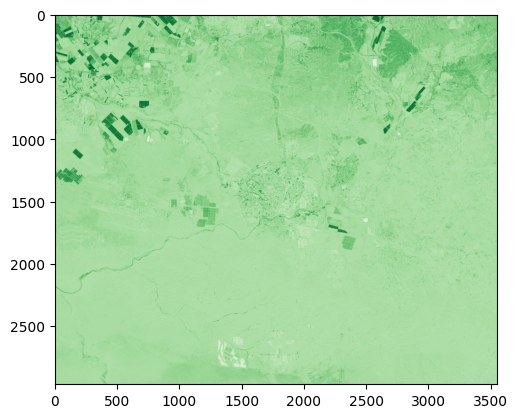

<Axes: >

In [47]:
rasterio.plot.show (ndvi, cmap = 'Greens')

The most straightforward filtering function is `ndimage.uniform_filter`, where each pixel in the “filtered” image is the average of pixel values inside a moving window of a specified size. For example, window size of 3 implies that each pixel in the filtered image is the average of 3*3 neighborhood centered on the “focal” pixel being calculated.

In [48]:
import scipy.ndimage

In [49]:
ndvi3 = scipy.ndimage.uniform_filter(ndvi, 3)

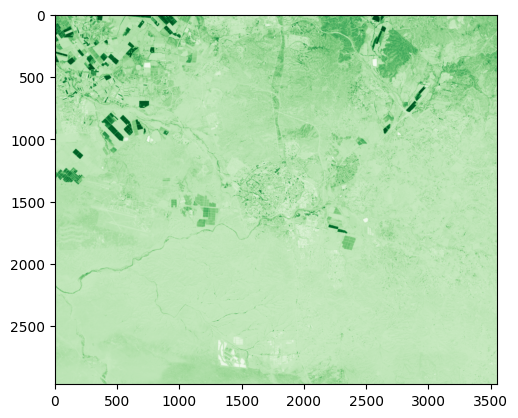

<Axes: >

In [50]:
rasterio.plot.show (ndvi3, cmap = 'Greens')

In [51]:
ndvi51 = scipy.ndimage.uniform_filter(ndvi, 51)

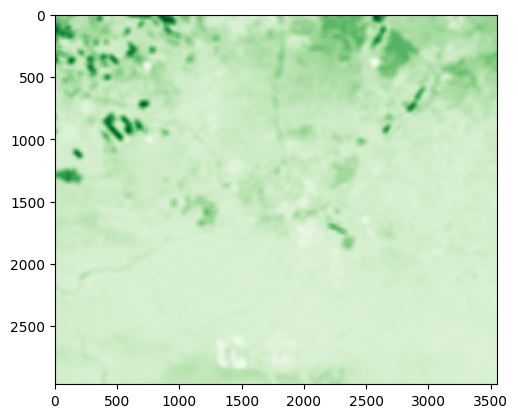

<Axes: >

In [52]:
rasterio.plot.show (ndvi51, cmap = 'Greens')

In [103]:
# read carmel csv file as an ndarray
m = np.genfromtxt ('/Users/shazia_manuawar/Documents/data/carmel.csv', delimiter =',')
m

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(624, 533))

In [104]:
m.dtype

dtype('float64')

In [105]:
# we'll convert it to int16 but int can't contain NAN, hence we also need to first convert them to -9999
m [np.isnan(m)] = -9999
m = m.astype (np.int16)
m


array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]],
      shape=(624, 533), dtype=int16)

In [106]:
# we need to assign origin and resolution, which is provided as
new_transform = rasterio.transform.from_origin(
    west=662317, 
    north=3658412, 
    xsize=90, 
    ysize=90
)
new_transform

Affine(90.0, 0.0, 662317.0,
       0.0, -90.0, 3658412.0)

In [107]:
# now we'll assign this .transform as well as the crs to write the dem raster in single band (count =1)
new_dataset = rasterio.open ('/Users/shazia_manuawar/Documents/data/output/carmel.tif', 'w',
             driver = 'Gtiff',
             height = m.shape[0],
             width = m.shape[1],
             count = 1,
             nodata = -9999,
             dtype = m.dtype,
             crs = 32636,
             transform = new_transform,
             compress='lzw'
             )

In [108]:
# it's a still a connection only. The data has yet to be written
new_dataset.write(m, 1)

In [109]:
# let's close the file now
new_dataset.close()

### Aspect calculation
Calculate the aspect of this dem. For that you'll need GDAL. This is run from CLI and not python. Neverthless you can run GDAL from within jupyter using `os.system` function.

In [110]:
os.system ('gdaldem aspect /Users/shazia_manuawar/Documents/data/output/carmel.tif /Users/shazia_manuawar/Documents/data/output/carmel_aspect.tif')

0...10...20...30...40...50...60...70...80...90...100 - done.


0

In [111]:
!gdalinfo --version

GDAL 3.11.0 "Eganville", released 2025/05/06


In [112]:
aspect = rasterio.open ('/Users/shazia_manuawar/Documents/data/output/carmel_aspect.tif')

In [113]:
aspect_array = aspect.read(1)

In [114]:
aspect_array.dtype

dtype('float32')

In [115]:
# let's check if the array contains any missing value.
np.isnan(aspect_array).any()

np.False_

In [116]:
s = aspect_array.copy()

In [117]:
s[(aspect_array > 315) | (aspect_array <= 45)] = 0
s[(aspect_array > 45) & (aspect_array <= 135)] = 1
s[(aspect_array > 135) & (aspect_array <= 225)] = 2
s[(aspect_array > 225) & (aspect_array <= 315)] = 3

In [118]:
print (aspect_array.shape)
print (s.shape)

(624, 533)
(624, 533)


In [119]:
dst = rasterio.open ('/Users/shazia_manuawar/Documents/data/output/carmel_aspect_reclassified.tif', 'w', **src.meta)

In [120]:
dst.write(s, 1)

In [121]:
dst.close()

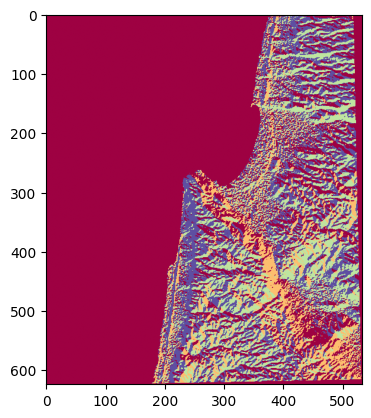

<Axes: >

In [122]:
rasterio.plot.show(s, cmap = 'Spectral')

<Axes: >

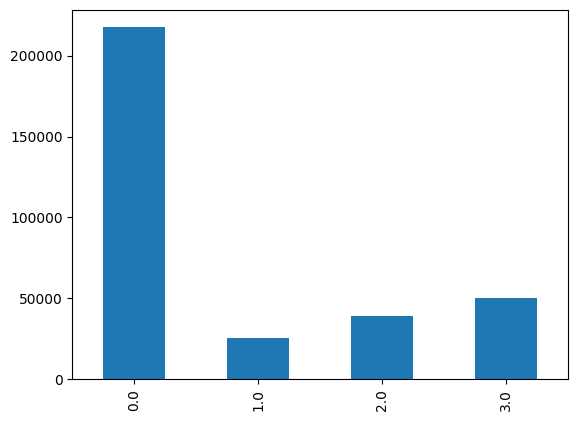

In [123]:
# Barplot
x = s.flatten()
x = pd.Series(x)
x = x.value_counts().sort_index()
x.plot.bar()

In [124]:
r

array([[[0.16  , 0.156 , 0.1598, ..., 0.1272, 0.1315, 0.1316],
        [0.1614, 0.157 , 0.1608, ..., 0.1196, 0.1262, 0.1316],
        [0.163 , 0.1584, 0.1619, ..., 0.1131, 0.1191, 0.1295],
        ...,
        [0.1597, 0.1576, 0.1599, ..., 0.2149, 0.2201, 0.2169],
        [0.1602, 0.1597, 0.1569, ..., 0.222 , 0.2238, 0.2228],
        [0.1577, 0.1577, 0.1563, ..., 0.2191, 0.2296, 0.2195]],

       [[0.1735, 0.1681, 0.1719, ..., 0.1361, 0.1396, 0.1358],
        [0.1747, 0.1711, 0.1723, ..., 0.1245, 0.1356, 0.1398],
        [0.1766, 0.1754, 0.1739, ..., 0.1133, 0.124 , 0.1344],
        ...,
        [0.1738, 0.1722, 0.1747, ..., 0.2501, 0.2602, 0.2647],
        [0.1736, 0.1736, 0.1705, ..., 0.2655, 0.2684, 0.2671],
        [0.1688, 0.169 , 0.168 , ..., 0.2652, 0.2719, 0.2693]],

       [[0.2107, 0.2101, 0.2107, ..., 0.1514, 0.161 , 0.1568],
        [0.212 , 0.2108, 0.2104, ..., 0.1294, 0.151 , 0.1549],
        [0.214 , 0.2124, 0.2109, ..., 0.0983, 0.1248, 0.1463],
        ...,
        [0.2

In [127]:
print (r.max())
print (r.min())

2.7999
0.0


In [128]:
# The value of the sentinel image array should lie from 0 to 1. We need to rescale this array

In [132]:
# r.isnan().any
np.isnan(r).any()

np.False_

In [133]:
r_rescaled = (r - r.min())/ (r.max() - r.min())

In [134]:
print (r_rescaled.max())
print (r_rescaled.min())

1.0
0.0


In [135]:
# evi2 = 2.5 * (nir-red/(nir + 2.4 * red +1))
r_rescaled.shape

(4, 2968, 3554)

In [143]:
evi2 = 2.5 * (r_rescaled [3] - r_rescaled [2])/ (r_rescaled [3] + 2.4 * r_rescaled [2] + 1)

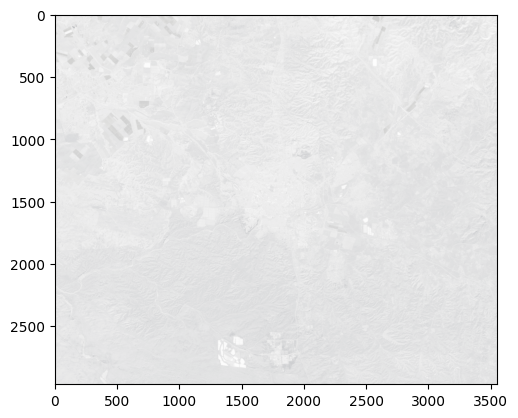

<Axes: >

In [144]:
rasterio.plot.show(r_rescaled, cmap = 'Greens')

The graph looks washed out in comparision to ndvi graph. This is coz the range of values is much smaller. Also note that `rasterio.plot.show` isn't good with arrays; it's more suitable for rasters.

Now to calculate the scatterplot, we'll first create a dataframe containg bioth the ndvi and evi2 and then calculate the scatterplot.

In [149]:
df = pd.DataFrame({'ndvi': ndvi.flatten(),
      'evi2': evi2.flatten()
     })

<Axes: xlabel='ndvi', ylabel='evi2'>

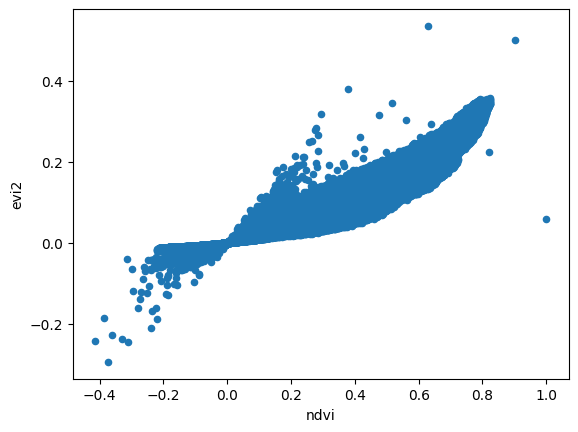

In [150]:
df.plot.scatter(x = 'ndvi', y = 'evi2')